In [37]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve, balanced_accuracy_score

In [2]:
IMAGE_PATH = '../data/train_images'
DATA_PATH = '../data/multiData'
METADATA_PATH = '../data/multiData/test_data.csv'


TRAIN_INPUT_PATH = DATA_PATH + '/' + 'X_train.pth' 
TRAIN_LABEL_PATH = DATA_PATH + '/' + 'y_train.pth'
VAL_INPUT_PATH = DATA_PATH + '/' + 'X_val.pth' 
VAL_LABEL_PATH = DATA_PATH + '/' + 'y_val.pth'
TEST_INPUT_PATH = DATA_PATH + '/' + 'X_test.pth' 
TEST_LABEL_PATH = DATA_PATH + '/' + 'y_test.pth'

In [3]:
X_train, y_train = torch.load(TRAIN_INPUT_PATH), torch.load(TRAIN_LABEL_PATH)
X_val, y_val = torch.load(VAL_INPUT_PATH), torch.load(VAL_LABEL_PATH)


In [4]:
X_train = X_train.reshape(X_train.shape[0], -1).numpy()
X_val = X_val.reshape(X_val.shape[0], -1).numpy()

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [10]:
def pipeline(pca_params, model_params, X_train, y_train, X_val, y_val):
    pca = PCA(**pca_params)
    print('Fitting PCA')
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    print('Fitting Model')
    model = LogisticRegression(**model_params)
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_train)
    y_pred2 = model.predict(X_val)
    try:
        acc, f1 = accuracy_score(y_val, y_pred2), f1_score(y_val, y_pred2, average='macro')
        print('Train:\tAccuracy: {:.4f}\tF1-score: {:.4f}'.format(accuracy_score(y_train, y_pred1), 
                                                                  f1_score(y_train, y_pred1, average='macro')))
        print('Valid:\tAccuracy: {:.4f}\tF1-score: {:.4f}'.format(acc, f1))
    
        return pca, model, acc, f1
    except:
        return pca, model

In [11]:
results = []
for values in [0.90, 0.925, 0.95, 0.975, 0.99]:
    result = pipeline({'n_components': values}, {'max_iter': 500}, X_train, y_train, X_val, y_val)
    results.append(result)

Fitting PCA
Fitting Model


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting PCA
Fitting Model


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting PCA
Fitting Model


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting PCA
Fitting Model


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting PCA
Fitting Model


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
var = [0.90, 0.925, 0.95, 0.975, 0.99]
n_comp = [i[0].n_components_ for i in results]

In [31]:
accs, f1s = [], []
for pca in results:
    X_train_pca = pca[0].transform(X_train)
    X_val_pca = pca[0].transform(X_val)
    print('Fitting Model')
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred1 = model.predict(X_train_pca)
    y_pred2 = model.predict(X_val_pca)
    acc, f1 = accuracy_score(y_val, y_pred2), f1_score(y_val, y_pred2, average='macro')
    print('Train:\tAccuracy: {:.4f}\tF1-score: {:.4f}'.format(accuracy_score(y_train, y_pred1), 
                                                              f1_score(y_train, y_pred1, average='macro')))
    print('Valid:\tAccuracy: {:.4f}\tF1-score: {:.4f}'.format(acc, f1))
    
    accs.append(acc)
    f1s.append(f1)

Fitting Model
Train:	Accuracy: 0.6744	F1-score: 0.3673
Valid:	Accuracy: 0.6841	F1-score: 0.3713
Fitting Model
Train:	Accuracy: 0.6984	F1-score: 0.3880
Valid:	Accuracy: 0.7117	F1-score: 0.3864
Fitting Model


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train:	Accuracy: 0.7124	F1-score: 0.4520
Valid:	Accuracy: 0.7096	F1-score: 0.4250
Fitting Model


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train:	Accuracy: 0.7369	F1-score: 0.5709
Valid:	Accuracy: 0.6874	F1-score: 0.4389
Fitting Model
Train:	Accuracy: 0.8242	F1-score: 0.7940
Valid:	Accuracy: 0.6314	F1-score: 0.4164


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


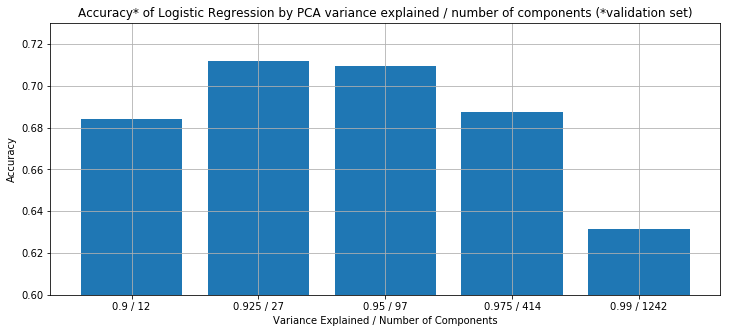

In [64]:
fig = plt.figure(figsize = (12, 5))
plt.bar([str(i)+' / '+str(j) for i,j in zip(var, n_comp)] , [i for i in accs])
plt.grid()
plt.ylim([0.6, 0.73])
plt.title('Accuracy* of Logistic Regression by PCA variance explained / number of components (*validation set)')
plt.xlabel('Variance Explained / Number of Components')
plt.ylabel('Accuracy')
plt.show()

In [45]:
TEST_INPUT_PATH = DATA_PATH + '/' + 'X_test.pth' 
TEST_LABEL_PATH = DATA_PATH + '/' + 'y_test.pth'
X_test, y_test = torch.load(TEST_INPUT_PATH), torch.load(TEST_LABEL_PATH)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1).numpy())

pca = results[1][0]
model = LogisticRegression(max_iter=1000)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
y_score = model.predict_proba(X_test_pca)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_pred, y_test)))
print('Balanced Accuracy score: {:.3f}'.format(balanced_accuracy_score(y_pred, y_test)))
print('F1 score: {:.3f}'.format(f1_score(y_pred, y_test, average='weighted')))

Accuracy score: 0.675
Balanced Accuracy score: 0.501
F1 score: 0.707


In [62]:
NUMBER_OF_ERROR =y_pred.shape[0] - y_pred[y_pred - y_test.numpy() == 0].shape[0]
print('Number of errors: {}'.format(NUMBER_OF_ERROR))

Number of errors: 789


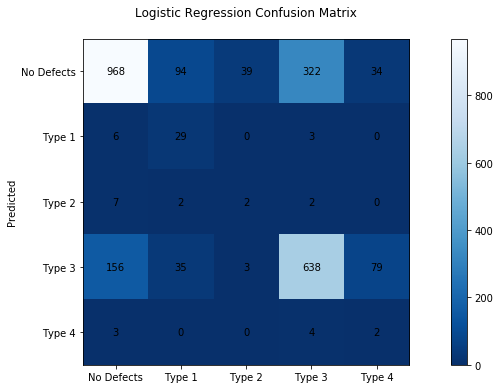

In [50]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(1, 1, 1)
cm = confusion_matrix(y_pred, y_test)
cm_plot = ax.matshow(cm, cmap='Blues_r')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('Predicted')
ax.set_yticklabels(['No Defects', 'No Defects', 'Type 1', 'Type 2', 'Type 3', 'Type 4'])
plt.colorbar(cm_plot)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['No Defects', 'No Defects', 'Type 1', 'Type 2', 'Type 3', 'Type 4'])
for i in range(5):
    for j in range(5):
        k = 0
        ax.text(j, i, cm[i, j], va='center', ha='center')

        
# ax = fig.add_subplot(1, 2, 2)
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# fpr, tpr, _ = roc_curve(y_test, y_score[:, 0])
# roc_auc = auc(tpr, fpr)
# ax.plot(tpr, fpr)
# ax.grid()
# ax.set_title('Logistic Regression AUC: {:.3f}'.format(roc_auc))
# plt.show()